<a href="https://colab.research.google.com/github/ayamostafa-cloud/Attack-on-Titans/blob/main/03_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, auc
)

# Load the cleaned provider dataset created in Notebook 1
df = pd.read_csv('/content/provider_dataset_cleaned(1).csv')

# Prepare X and y
X = df.drop(columns=['Provider', 'Fraud'])
y = df['Fraud']

# Use SAME split as Notebook 2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

print("Data loaded and split successfully.")


Data loaded and split successfully.


In [ ]:
import joblib

# Load trained models from Notebook 2
log_model = joblib.load('/content/log_model(1).pkl')
rf_model = joblib.load('/content/rf_model(1).pkl')
gb_model = joblib.load('/content/gb_model(1).pkl')

print("Models loaded successfully.")
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


Models loaded successfully.


In [ ]:
models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model
}

for name, model in models.items():
    print("\n==============================")
    print(name)
    print("==============================")

    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    y_prob = model.predict_proba(X_test)[:,1]
    print("ROC AUC:", roc_auc_score(y_test, y_prob))



Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.61      0.75       981
           1       0.19      0.86      0.31       101

    accuracy                           0.63      1082
   macro avg       0.58      0.74      0.53      1082
weighted avg       0.90      0.63      0.71      1082

Confusion Matrix:
[[599 382]
 [ 14  87]]
ROC AUC: 0.7277984679201865

Random Forest


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.97      0.92      0.94       981
           1       0.48      0.72      0.58       101

    accuracy                           0.90      1082
   macro avg       0.73      0.82      0.76      1082
weighted avg       0.92      0.90      0.91      1082

Confusion Matrix:
[[902  79]
 [ 28  73]]
ROC AUC: 0.9459230326702395

Gradient Boosting
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       981
           1       0.42      0.86      0.56       101

    accuracy                           0.88      1082
   macro avg       0.70      0.87      0.75      1082
weighted avg       0.93      0.88      0.89      1082

Confusion Matrix:
[[860 121]
 [ 14  87]]
ROC AUC: 0.9506716726718543


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


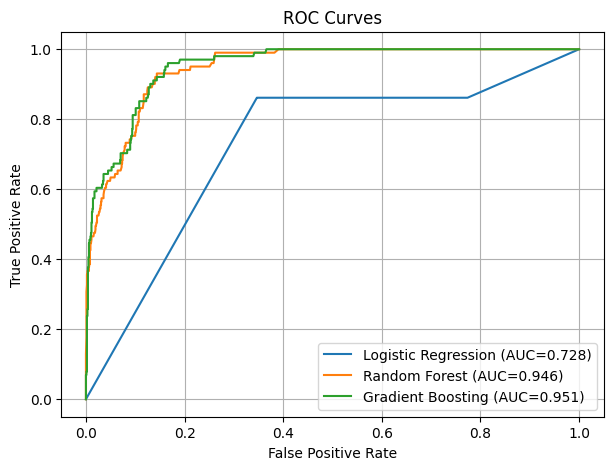

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


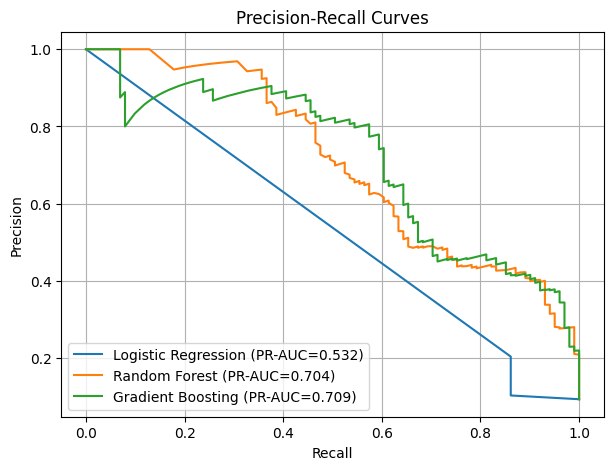

In [ ]:
# ROC curves
plt.figure(figsize=(7,5))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.3f})")

plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall curves
plt.figure(figsize=(7,5))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{name} (PR-AUC={pr_auc:.3f})")

plt.title("Precision-Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
error_cases = {}

for name, model in models.items():
    y_pred = model.predict(X_test)

    # False Positive = model predicted fraud but label is 0
    fp = X_test[(y_pred == 1) & (y_test == 0)]
    # False Negative = model predicted normal but label is 1
    fn = X_test[(y_pred == 0) & (y_test == 1)]

    error_cases[name] = {
        "false_positives": fp.head(3),
        "false_negatives": fn.head(3)
    }

    print(f"\n===== {name} ERROR ANALYSIS =====")
    print("\nFalse Positives:")
    print(fp.head(3))

    print("\nFalse Negatives:")
    print(fn.head(3))



===== Logistic Regression ERROR ANALYSIS =====

False Positives:
      InscClaimAmtReimbursed_x  DeductibleAmtPaid_x  ClaimDuration_x  \
1736                    5000.0               1068.0         8.000000   
4648                  219000.0              24564.0         6.708333   
225                    37000.0               3204.0         3.333333   

      InpatientClaimCount  InscClaimAmtReimbursed_y  DeductibleAmtPaid_y  \
1736                  1.0                    1220.0                  0.0   
4648                 24.0                    1900.0                  0.0   
225                   3.0                     220.0                  0.0   

      ClaimDuration_y  OutpatientClaimCount  
1736         0.846154                  13.0  
4648         0.000000                   1.0  
225          5.333333                   3.0  

False Negatives:
      InscClaimAmtReimbursed_x  DeductibleAmtPaid_x  ClaimDuration_x  \
4547                       0.0                  0.0              0

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


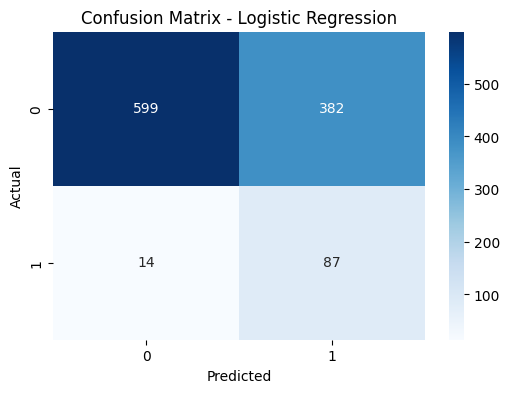

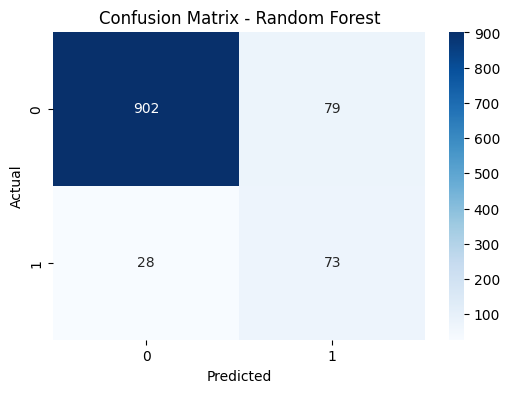

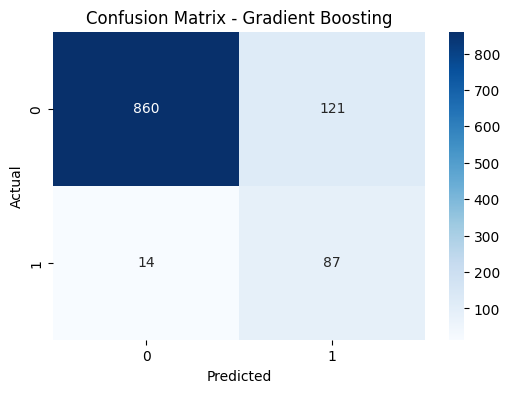

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


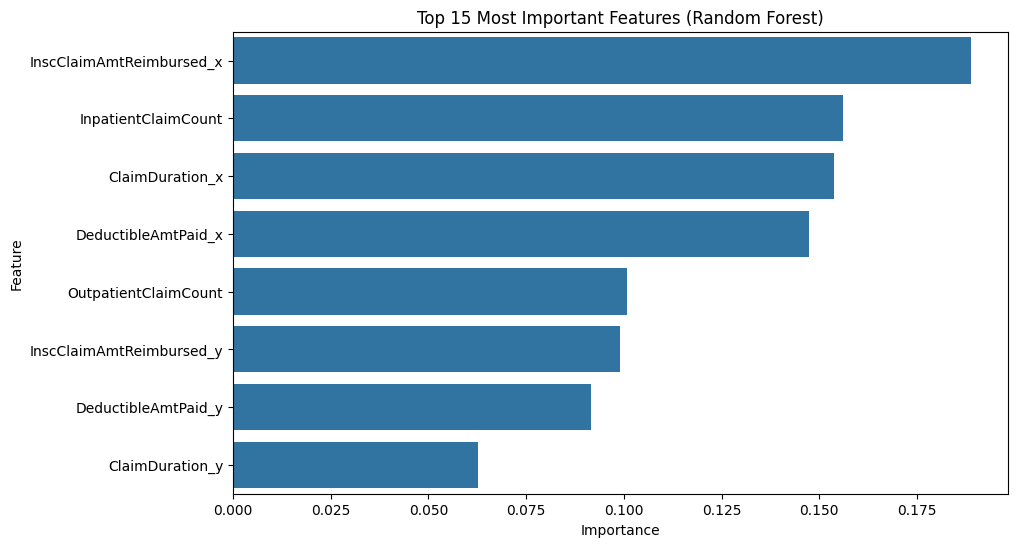

,Feature,Importance
0,InscClaimAmtReimbursed_x,0.188792
3,InpatientClaimCount,0.156135
2,ClaimDuration_x,0.153661
1,DeductibleAmtPaid_x,0.147273
7,OutpatientClaimCount,0.100789
4,InscClaimAmtReimbursed_y,0.099070
5,DeductibleAmtPaid_y,0.091564
6,ClaimDuration_y,0.062715


In [ ]:
importances = rf_model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15))
plt.title("Top 15 Most Important Features (Random Forest)")
plt.show()

feat_df.head(15)


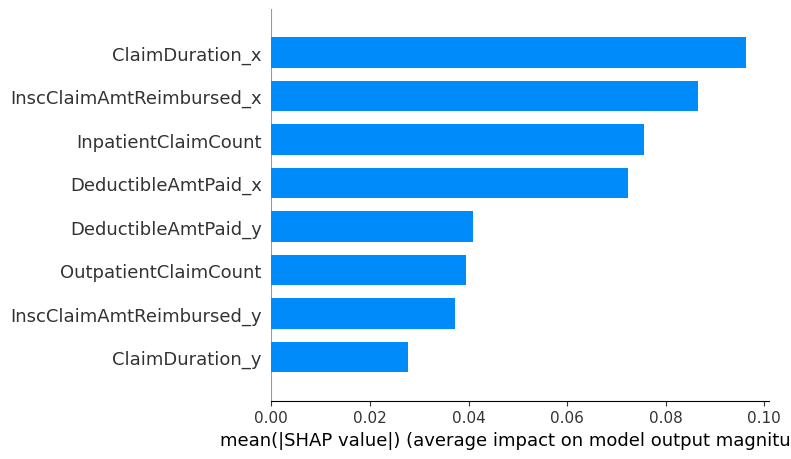

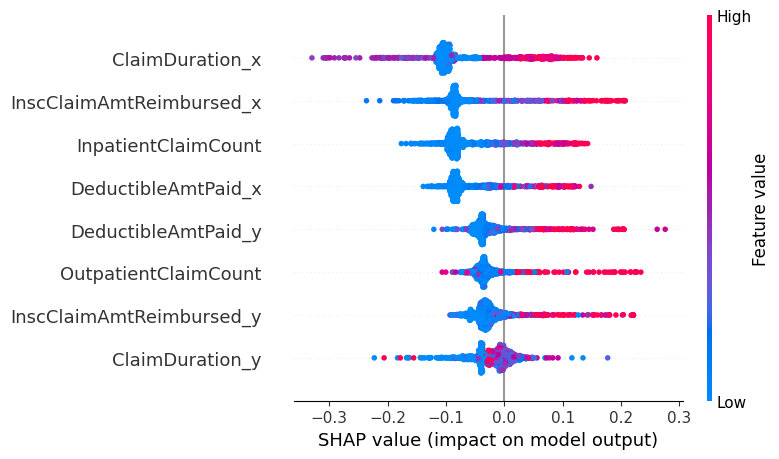

In [ ]:
import shap

# SHAP for Random Forest
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar")
shap.summary_plot(shap_values[:, :, 1], X_test)


🧠 Business Interpretation: Cost of Errors

False Positives (Model predicts Fraud but real provider is clean):

Leads to unnecessary investigations

Wastes government auditing resources

Damages provider reputation

Expensive but safer than FN

False Negatives (Model predicts Non-Fraud but real provider is fraud):

Most dangerous

Medicare loses money

Fraudulent behavior goes undetected

Encourages future fraud

➡️ Therefore:
We prefer maximizing Recall for class = Fraud
PR-AUC is more important than Accuracy or ROC-AUC